In [1]:
import numpy as np
import pandas as pd
import sys
import os
import importlib

sys.path.append(os.path.abspath("../base"))
import classify
import features
pd.set_option("display.max_columns", None)

In [326]:
importlib.reload(classify)  # Reload the classify module
importlib.reload(features)

<module 'features' from '/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/features.py'>

In [300]:
categories, consumer, acct, transactions = features.get_datasets()
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer)
all_features = features.get_total_transactions(all_features, transaction_categories)

In [301]:
all_features = features.get_categorical_features2(
    all_features, transaction_categories, acct
)

In [302]:
all_features.to_csv('../../data_q2/features.csv', index = False)

In [303]:
all_features = pd.read_csv("../../data_q2/features.csv")
na_consumers = consumer[consumer["DQ_TARGET"].isna()]["prism_consumer_id"].astype(int)
all_features = all_features[~all_features["prism_consumer_id"].isin(na_consumers)]
all_features = all_features.set_index('prism_consumer_id')
all_features = all_features[all_features['transactions'] > 1]


LightGBM Results
ROC-AUC: 0.800 | Accuracy: 0.917
Training Time: 4.7s | Predicting Time: 0.000023s
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      2112
         1.0       0.45      0.16      0.23       184

    accuracy                           0.92      2296
   macro avg       0.69      0.57      0.59      2296
weighted avg       0.89      0.92      0.90      2296



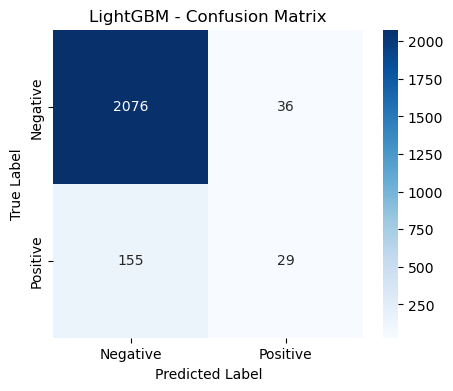


XGBoost Results
ROC-AUC: 0.801 | Accuracy: 0.915
Training Time: 5.7s | Predicting Time: 0.000008s
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      2112
         1.0       0.43      0.20      0.27       184

    accuracy                           0.92      2296
   macro avg       0.68      0.59      0.61      2296
weighted avg       0.89      0.92      0.90      2296



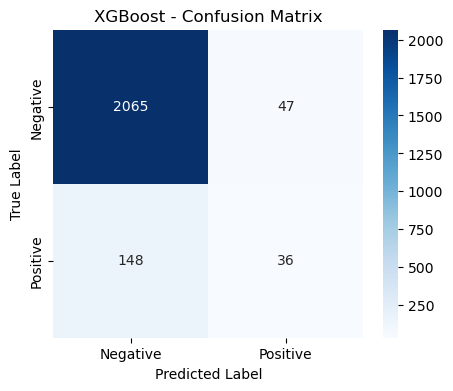


CatBoost Results
ROC-AUC: 0.795 | Accuracy: 0.912
Training Time: 7.4s | Predicting Time: 0.000009s
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      2112
         1.0       0.40      0.18      0.25       184

    accuracy                           0.91      2296
   macro avg       0.66      0.58      0.60      2296
weighted avg       0.89      0.91      0.90      2296



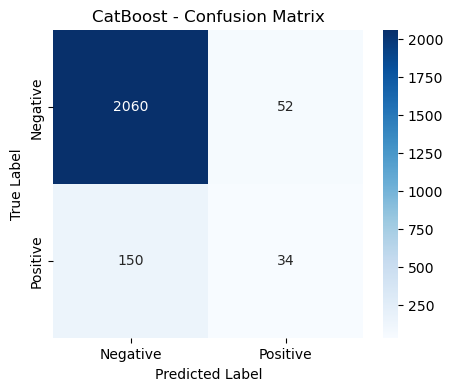


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.805 | Accuracy: 0.918
Precision: 0.894 | Recall: 0.918 | F1-score: 0.900
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      2112
         1.0       0.46      0.17      0.25       184

    accuracy                           0.92      2296
   macro avg       0.70      0.58      0.60      2296
weighted avg       0.89      0.92      0.90      2296


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
Weighted Ensemble 0.804904  0.917683   0.894243 0.917683  0.900065         NaN           NaN
          XGBoost 0.800840  0.915070   0.893102 0.915070  0.899998    5.670310      0.000008
         LightGBM 0.799657  0.916812   0.891707 0.916812  0.898073    4.669680      0.000023
         CatBoost 0.795403  0.912021   0.8891

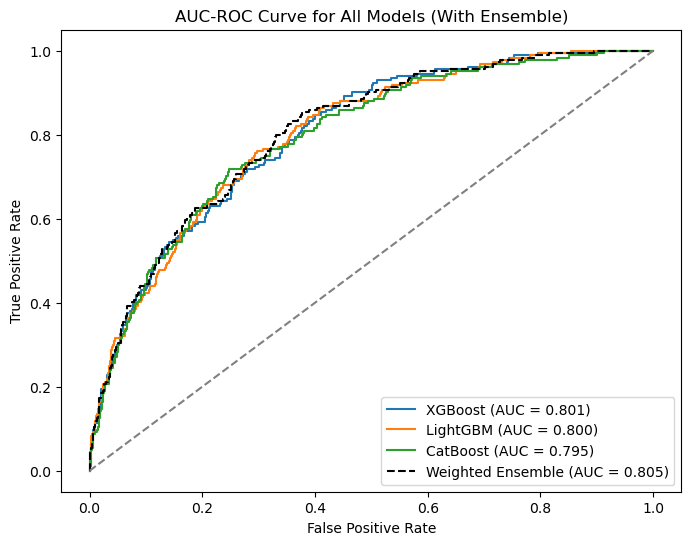

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 3  Weighted Ensemble  0.804904  0.917683         NaN           NaN   0.894243   
 1            XGBoost  0.800840  0.915070    5.670310      0.000008   0.893102   
 0           LightGBM  0.799657  0.916812    4.669680      0.000023   0.891707   
 2           CatBoost  0.795403  0.912021    7.383485      0.000009   0.889110   
 
      recall  f1-score  support  
 3  0.917683  0.900065      NaN  
 1  0.915070  0.899998   2296.0  
 0  0.916812  0.898073   2296.0  
 2  0.912021  0.897052   2296.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_cat

In [290]:
classification_features = (
    all_features.drop(columns=["evaluation_date", "DQ_TARGET"])
).columns
classify.run_classification2(classification_features, "DQ_TARGET", all_features)


LightGBM Results
ROC-AUC: 0.820 | Accuracy: 0.907
Training Time: 5.5s | Predicting Time: 0.000031s
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1818
         1.0       0.49      0.13      0.21       185

    accuracy                           0.91      2003
   macro avg       0.70      0.56      0.58      2003
weighted avg       0.88      0.91      0.88      2003



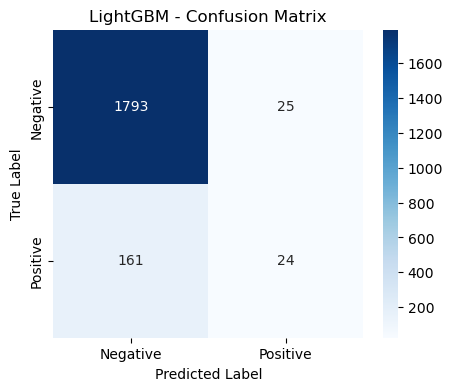


Balanced RF Results
ROC-AUC: 0.807 | Accuracy: 0.907
Training Time: 39.2s | Predicting Time: 0.000065s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.49      0.16      0.24       185

    accuracy                           0.91      2003
   macro avg       0.71      0.57      0.59      2003
weighted avg       0.88      0.91      0.88      2003



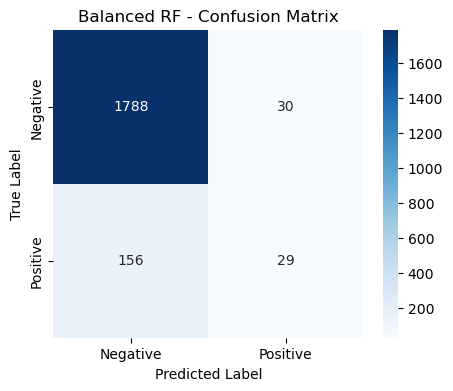


XGBoost Results
ROC-AUC: 0.810 | Accuracy: 0.903
Training Time: 4.7s | Predicting Time: 0.000008s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.42      0.15      0.22       185

    accuracy                           0.90      2003
   macro avg       0.67      0.57      0.59      2003
weighted avg       0.87      0.90      0.88      2003



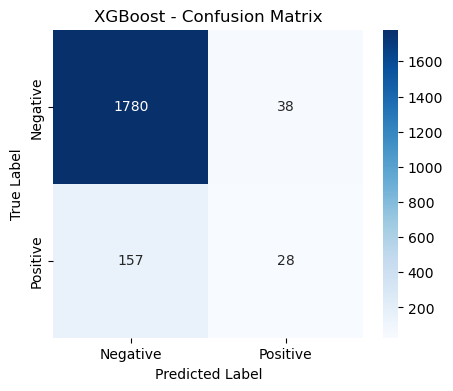


CatBoost Results
ROC-AUC: 0.815 | Accuracy: 0.899
Training Time: 7.8s | Predicting Time: 0.000009s
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1818
         1.0       0.40      0.19      0.26       185

    accuracy                           0.90      2003
   macro avg       0.66      0.58      0.60      2003
weighted avg       0.87      0.90      0.88      2003



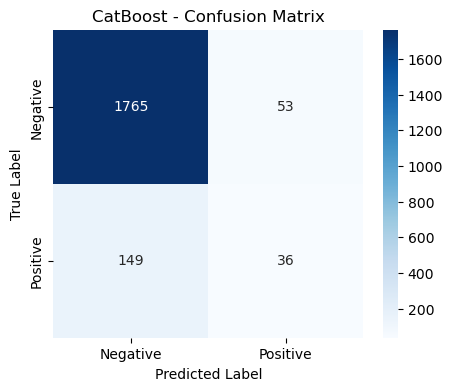


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.826 | Accuracy: 0.909
Precision: 0.882 | Recall: 0.909 | F1-score: 0.885
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1818
         1.0       0.52      0.15      0.23       185

    accuracy                           0.91      2003
   macro avg       0.72      0.57      0.59      2003
weighted avg       0.88      0.91      0.89      2003


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
Weighted Ensemble 0.825912  0.908637   0.882416 0.908637  0.885187         NaN           NaN
         LightGBM 0.819511  0.907139   0.878092 0.907139  0.881828    5.522279      0.000031
         CatBoost 0.815184  0.899151   0.874341 0.899151  0.882781    7.821693      0.000009
          XGBoost 0.809794  0.902646   0.8732

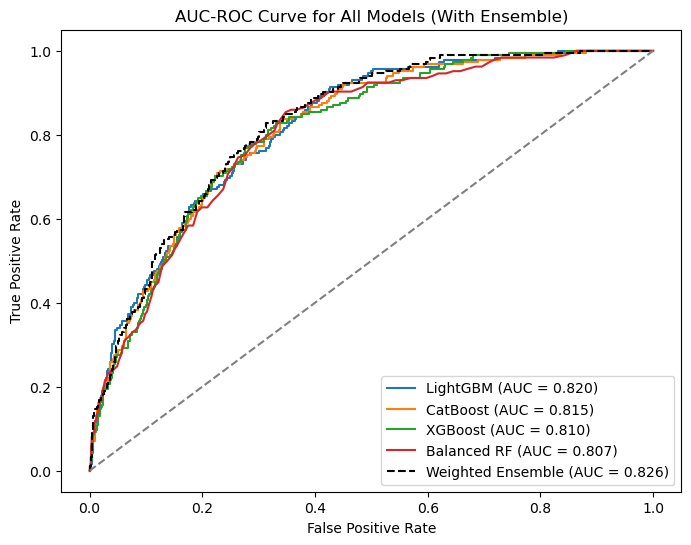

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 4  Weighted Ensemble  0.825912  0.908637         NaN           NaN   0.882416   
 0           LightGBM  0.819511  0.907139    5.522279      0.000031   0.878092   
 3           CatBoost  0.815184  0.899151    7.821693      0.000009   0.874341   
 2            XGBoost  0.809794  0.902646    4.736510      0.000008   0.873255   
 1        Balanced RF  0.807366  0.907139   39.196540      0.000065   0.880201   
 
      recall  f1-score  support  
 4  0.908637  0.885187      NaN  
 0  0.907139  0.881828   2003.0  
 3  0.899151  0.882781   2003.0  
 2  0.902646  0.881111   2003.0  
 1  0.907139  0.884718   2003.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'Balanced RF': BalancedRandomForestClassifier(n_estimators=200, random_state=42),
  'XGBoost': XGBClassifier(base_score=None

In [153]:
classification_features = (all_features.drop(columns = ['evaluation_date', 'DQ_TARGET'])).columns
classify.run_classification2(classification_features, "DQ_TARGET", all_features)

In [305]:
classification_features = (
    all_features.drop(columns=["evaluation_date", "DQ_TARGET"])
).columns
best_features = classify.get_best_features(classification_features, 'DQ_TARGET', all_features, n_features = 200)

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide




Top Features (RandomForestClassifier):
                           Feature  Importance  Correlation
                      credit_score    0.060440    -0.279325
                           balance    0.041501    -0.038746
                ACCOUNT_FEES_count    0.027330     0.024066
              account_type_SAVINGS    0.024256    -0.110443
               ACCOUNT_FEES_median    0.022893     0.001439
                  OVERDRAFT_median    0.016741    -0.000057
                  ACCOUNT_FEES_std    0.016102     0.011815
                   OVERDRAFT_count    0.016073     0.075768
                     OVERDRAFT_std    0.013375     0.014835
                       BNPL_median    0.012668     0.012941
                 SELF_TRANSFER_iqr    0.009833    -0.039885
                 AUTOMOTIVE_median    0.009731    -0.011286
                    ATM_CASH_count    0.008960     0.020535
                        BNPL_count    0.008629     0.044866
                        LOAN_count    0.008171     0.051421



LightGBM Results
ROC-AUC: 0.835 | Accuracy: 0.914
Training Time: 4.4s | Predicting Time: 0.000024s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.30      0.15      0.19       186

    accuracy                           0.91      2602
   macro avg       0.62      0.56      0.57      2602
weighted avg       0.89      0.91      0.90      2602



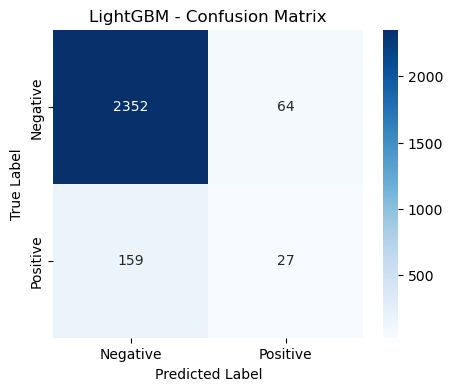


XGBoost Results
ROC-AUC: 0.824 | Accuracy: 0.910
Training Time: 4.3s | Predicting Time: 0.000006s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.27      0.15      0.19       186

    accuracy                           0.91      2602
   macro avg       0.60      0.56      0.57      2602
weighted avg       0.89      0.91      0.90      2602



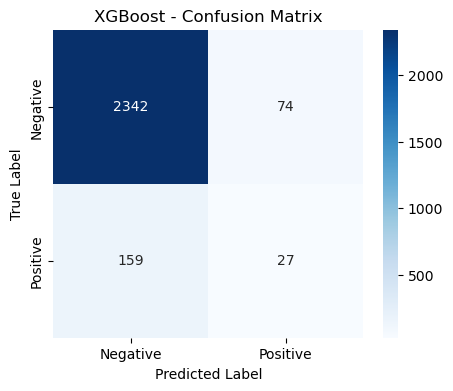


CatBoost Results
ROC-AUC: 0.820 | Accuracy: 0.909
Training Time: 6.0s | Predicting Time: 0.000007s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.28      0.18      0.22       186

    accuracy                           0.91      2602
   macro avg       0.61      0.57      0.58      2602
weighted avg       0.89      0.91      0.90      2602



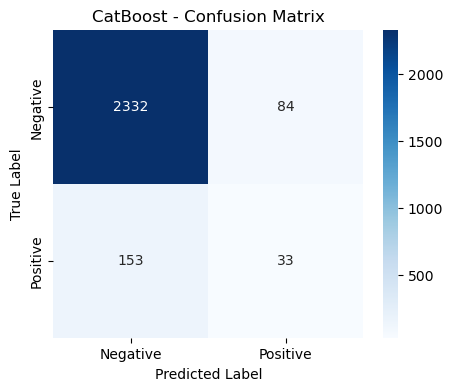


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.831 | Accuracy: 0.912
Precision: 0.888 | Recall: 0.912 | F1-score: 0.898
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.27      0.13      0.18       186

    accuracy                           0.91      2602
   macro avg       0.60      0.55      0.57      2602
weighted avg       0.89      0.91      0.90      2602


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
         LightGBM 0.835443  0.914297   0.890931 0.914297  0.900427    4.377159      0.000024
Weighted Ensemble 0.831412  0.911606   0.887922 0.911606  0.897910         NaN           NaN
          XGBoost 0.824339  0.910453   0.888596 0.910453  0.897967    4.327288      0.000006
         CatBoost 0.820320  0.908916   0.8915

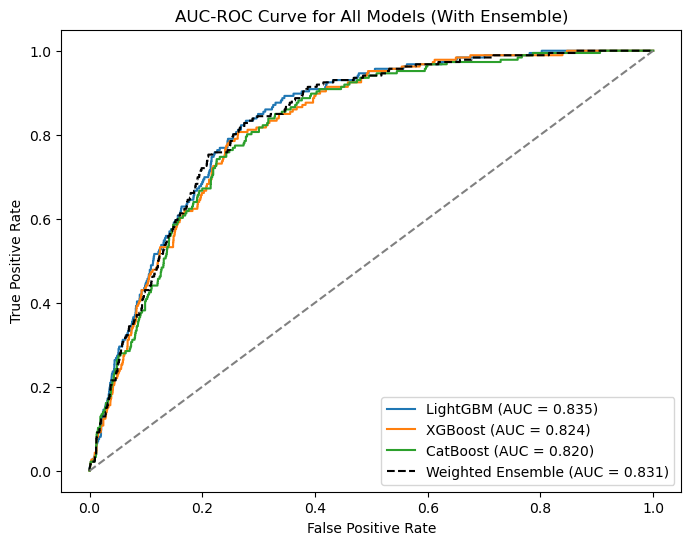

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 0           LightGBM  0.835443  0.914297    4.377159      0.000024   0.890931   
 3  Weighted Ensemble  0.831412  0.911606         NaN           NaN   0.887922   
 1            XGBoost  0.824339  0.910453    4.327288      0.000006   0.888596   
 2           CatBoost  0.820320  0.908916    5.962452      0.000007   0.891510   
 
      recall  f1-score  support  
 0  0.914297  0.900427   2602.0  
 3  0.911606  0.897910      NaN  
 1  0.910453  0.897967   2602.0  
 2  0.908916  0.899186   2602.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_cat

In [318]:
classify.run_classification2(best_features[0][:200], "DQ_TARGET", all_features)



LightGBM Results
ROC-AUC: 0.810 | Accuracy: 0.907
Training Time: 2.4s | Predicting Time: 0.000019s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.49      0.15      0.23       185

    accuracy                           0.91      2003
   macro avg       0.71      0.57      0.59      2003
weighted avg       0.88      0.91      0.88      2003



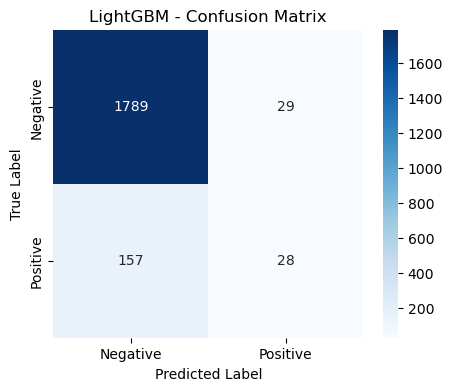


XGBoost Results
ROC-AUC: 0.800 | Accuracy: 0.904
Training Time: 2.2s | Predicting Time: 0.000006s
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.44      0.17      0.24       185

    accuracy                           0.90      2003
   macro avg       0.68      0.57      0.60      2003
weighted avg       0.88      0.90      0.88      2003



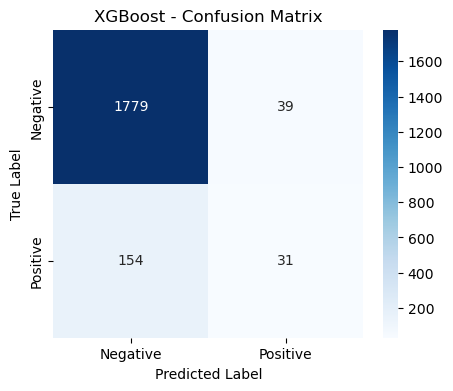


CatBoost Results
ROC-AUC: 0.805 | Accuracy: 0.900
Training Time: 2.8s | Predicting Time: 0.000006s
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1818
         1.0       0.41      0.19      0.26       185

    accuracy                           0.90      2003
   macro avg       0.67      0.58      0.60      2003
weighted avg       0.87      0.90      0.88      2003



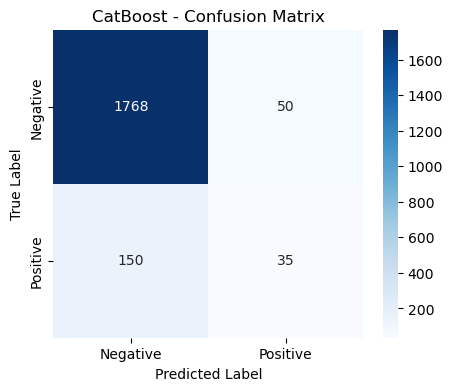


Ensemble model saved as 'WeightedEnsemble.joblib'

Ensemble Model Results
ROC-AUC: 0.810 | Accuracy: 0.906
Precision: 0.878 | Recall: 0.906 | F1-score: 0.884
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1818
         1.0       0.47      0.16      0.24       185

    accuracy                           0.91      2003
   macro avg       0.69      0.57      0.60      2003
weighted avg       0.88      0.91      0.88      2003


======================================== FINAL RESULTS ========================================
            model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
Weighted Ensemble 0.810157  0.905642   0.878378 0.905642  0.884235         NaN           NaN
         LightGBM 0.809630  0.907139   0.879782 0.907139  0.884160    2.411584      0.000019
         CatBoost 0.804864  0.900150   0.874687 0.900150  0.882995    2.842416      0.000006
          XGBoost 0.800175  0.903645   0.8762

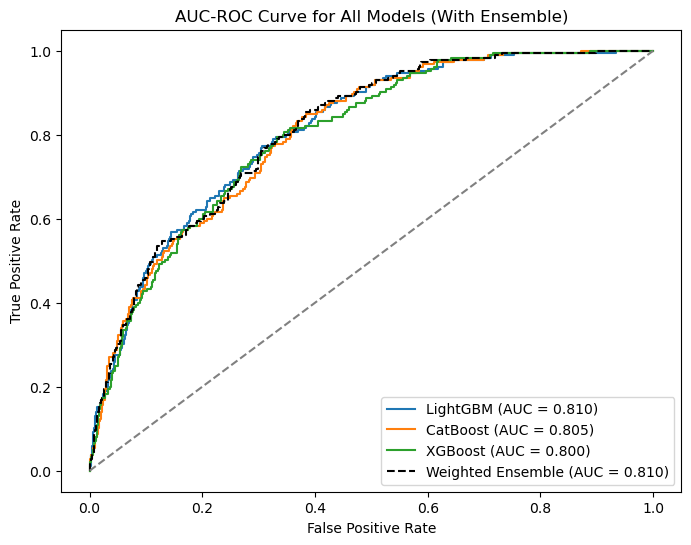

(               model   roc_auc  accuracy  train_time  predict_time  precision  \
 3  Weighted Ensemble  0.810157  0.905642         NaN           NaN   0.878378   
 0           LightGBM  0.809630  0.907139    2.411584      0.000019   0.879782   
 2           CatBoost  0.804864  0.900150    2.842416      0.000006   0.874687   
 1            XGBoost  0.800175  0.903645    2.162189      0.000006   0.876231   
 
      recall  f1-score  support  
 3  0.905642  0.884235      NaN  
 0  0.907139  0.884160   2003.0  
 2  0.900150  0.882995   2003.0  
 1  0.903645  0.883394   2003.0  ,
 {'LightGBM': LGBMClassifier(colsample_bytree=0.8, force_row_wise=True, learning_rate=0.05,
                 n_estimators=200, objective='binary', subsample=0.8, verbose=-1),
  'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_cat

In [308]:
classify.run_classification2(best_features[2][:100], "DQ_TARGET", all_features)

In [327]:
categories, consumer, acct, transactions = features.get_datasets()
consumer = consumer[consumer['DQ_TARGET'].isna()]
transactions = transactions[transactions['prism_consumer_id'].isin(consumer['prism_consumer_id'])]
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer)
all_features = features.get_total_transactions(all_features, transaction_categories)
na_features = features.get_categorical_features2(
    all_features, transaction_categories, acct
)
na_features = na_features.set_index('prism_consumer_id')

In [328]:
na_features

,evaluation_date,credit_score,DQ_TARGET,account_type_401K,account_type_AUTO,account_type_BROKERAGE,account_type_CASH MANAGEMENT,account_type_CD,account_type_CHECKING,account_type_CONSUMER,account_type_CREDIT CARD,account_type_HOME EQUITY,account_type_HSA,account_type_IRA,account_type_LINE OF CREDIT,account_type_LOAN,account_type_MONEY MARKET,account_type_MONEYMARKET,account_type_MORTGAGE,account_type_OTHER,account_type_OVERDRAFT,account_type_PREPAID,account_type_RETIREMENT,account_type_ROTH,account_type_SAVINGS,account_type_STOCK PLAN,account_type_STUDENT,transactions,ACCOUNT_FEES_coef_variation,ATM_CASH_coef_variation,AUTOMOTIVE_coef_variation,AUTO_LOAN_coef_variation,BANKING_CATCH_ALL_coef_variation,BILLS_UTILITIES_coef_variation,BNPL_coef_variation,CORPORATE_PAYMENTS_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,DEBT_coef_variation,DEPOSIT_coef_variation,ENTERTAINMENT_coef_variation,ESSENTIAL_SERVICES_coef_variation,EXTERNAL_TRANSFER_coef_variation,FITNESS_coef_variation,FOOD_AND_BEVERAGES_coef_variation,GAMBLING_coef_variation,GENERAL_MERCHANDISE_coef_variation,GIFTS_DONATIONS_coef_variation,GOVERNMENT_SERVICES_coef_variation,GROCERIES_coef_variation,INSURANCE_coef_variation,INVESTMENT_coef_variation,INVESTMENT_INCOME_coef_variation,LEGAL_coef_variation,LOAN_coef_variation,MISCELLANEOUS_coef_variation,MORTGAGE_coef_variation,OTHER_BENEFITS_coef_variation,OVERDRAFT_coef_variation,PAYCHECK_coef_variation,PETS_coef_variation,REFUND_coef_variation,RENT_coef_variation,RISK_CATCH_ALL_coef_variation,RTO_LTO_coef_variation,SELF_TRANSFER_coef_variation,TAX_coef_variation,TIME_OR_STUFF_coef_variation,TRANSPORATION_coef_variation,TRAVEL_coef_variation,ACCOUNT_FEES_count,ATM_CASH_count,AUTOMOTIVE_count,AUTO_LOAN_count,BANKING_CATCH_ALL_count,BILLS_UTILITIES_count,BNPL_count,CORPORATE_PAYMENTS_count,CREDIT_CARD_PAYMENT_count,DEBT_count,DEPOSIT_count,ENTERTAINMENT_count,ESSENTIAL_SERVICES_count,EXTERNAL_TRANSFER_count,FITNESS_count,FOOD_AND_BEVERAGES_count,GAMBLING_count,GENERAL_MERCHANDISE_count,GIFTS_DONATIONS_count,GOVERNMENT_SERVICES_count,GROCERIES_count,INSURANCE_count,INVESTMENT_count,INVESTMENT_INCOME_count,LEGAL_count,LOAN_count,MISCELLANEOUS_count,MORTGAGE_count,OTHER_BENEFITS_count,OVERDRAFT_count,PAYCHECK_count,PETS_count,REFUND_count,RENT_count,RISK_CATCH_ALL_count,RTO_LTO_count,SELF_TRANSFER_count,TAX_count,TIME_OR_STUFF_count,TRANSPORATION_count,TRAVEL_count,ACCOUNT_FEES_iqr,ATM_CASH_iqr,AUTOMOTIVE_iqr,AUTO_LOAN_iqr,BANKING_CATCH_ALL_iqr,BILLS_UTILITIES_iqr,BNPL_iqr,CORPORATE_PAYMENTS_iqr,CREDIT_CARD_PAYMENT_iqr,DEBT_iqr,DEPOSIT_iqr,ENTERTAINMENT_iqr,ESSENTIAL_SERVICES_iqr,EXTERNAL_TRANSFER_iqr,FITNESS_iqr,FOOD_AND_BEVERAGES_iqr,GAMBLING_iqr,GENERAL_MERCHANDISE_iqr,GIFTS_DONATIONS_iqr,GOVERNMENT_SERVICES_iqr,GROCERIES_iqr,INSURANCE_iqr,INVESTMENT_iqr,INVESTMENT_INCOME_iqr,LEGAL_iqr,LOAN_iqr,MISCELLANEOUS_iqr,MORTGAGE_iqr,OTHER_BENEFITS_iqr,OVERDRAFT_iqr,PAYCHECK_iqr,PETS_iqr,REFUND_iqr,RENT_iqr,RISK_CATCH_ALL_iqr,RTO_LTO_iqr,SELF_TRANSFER_iqr,TAX_iqr,TIME_OR_STUFF_iqr,TRANSPORATION_iqr,TRAVEL_iqr,ACCOUNT_FEES_median,ATM_CASH_median,AUTOMOTIVE_median,AUTO_LOAN_median,BANKING_CATCH_ALL_median,BILLS_UTILITIES_median,BNPL_median,CORPORATE_PAYMENTS_median,CREDIT_CARD_PAYMENT_median,DEBT_median,DEPOSIT_median,ENTERTAINMENT_median,ESSENTIAL_SERVICES_median,EXTERNAL_TRANSFER_median,FITNESS_median,FOOD_AND_BEVERAGES_median,GAMBLING_median,GENERAL_MERCHANDISE_median,GIFTS_DONATIONS_median,GOVERNMENT_SERVICES_median,GROCERIES_median,INSURANCE_median,INVESTMENT_median,INVESTMENT_INCOME_median,LEGAL_median,LOAN_median,MISCELLANEOUS_median,MORTGAGE_median,OTHER_BENEFITS_median,OVERDRAFT_median,PAYCHECK_median,PETS_median,REFUND_median,RENT_median,RISK_CATCH_ALL_median,RTO_LTO_median,SELF_TRANSFER_median,TAX_median,TIME_OR_STUFF_median,TRANSPORATION_median,TRAVEL_median,ACCOUNT_FEES_skewness,ATM_CASH_skewness,AUTOMOTIVE_skewness,AUTO_LOAN_skewness,BANKING_CATCH_ALL_skewness,BILLS_UTILITIES_skewness,BNPL_skewness,CORPORATE_PAYMENTS_s

/opt/anaconda3/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray

/opt/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:941: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



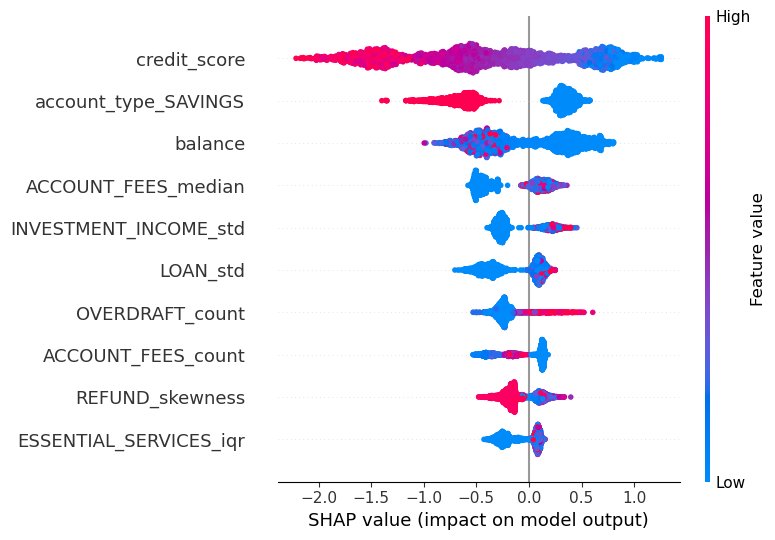

/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/classify.py:145: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/classify.py:153: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



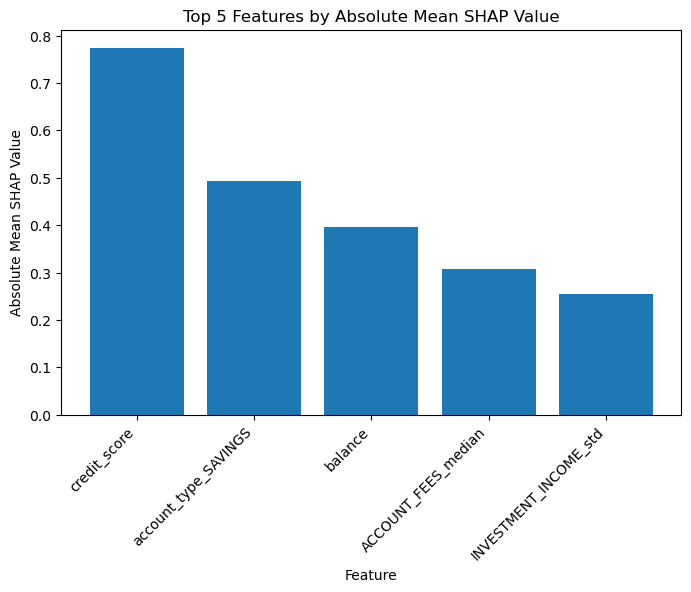

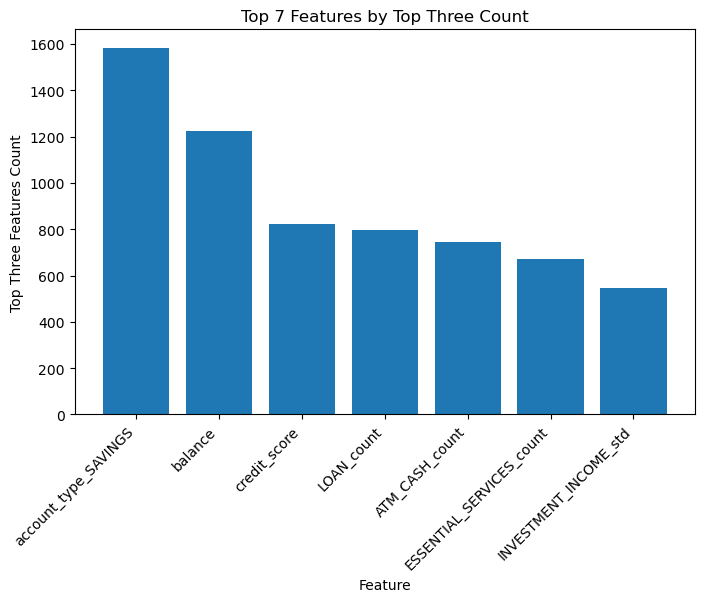

In [329]:
info = classify.individual_test(best_features[0][:200], "LightGBM", na_features)

In [330]:
info

,probability,top_1_feature,top_1_score,top_2_feature,top_2_score,top_3_feature,top_3_score
prism_consumer_id,,,,,,,
4000,5,ATM_CASH_count,0.197096,ESSENTIAL_SERVICES_count,0.152379,ACCOUNT_FEES_count,0.140193
4001,30,LOAN_count,0.161585,REFUND_mean,0.129386,ACCOUNT_FEES_count,0.117561
4002,5,REFUND_skewness,0.161330,ESSENTIAL_SERVICES_count,0.148610,ACCOUNT_FEES_count,0.121736
4003,36,BANKING_CATCH_ALL_coef_variation,0.265769,ATM_CASH_count,0.206496,ESSENTIAL_SERVICES_count,0.164008
4004,3,ATM_CASH_count,0.206104,LOAN_count,0.145255,ACCOUNT_FEES_count,0.121508
...,...,...,...,...,...,...,...
14995,230,balance,0.474529,account_type_SAVINGS,0.424305,BNPL_mean,0.173496
14996,26,INVESTMENT_INCOME_std,0.285441,BANKING_CATCH_ALL_coef_variation,0.222544,ACCOUNT_FEES_median,0.222124
14997,82,balance,0.482480,account_type_SAVINGS,0.325705,ESSENTIAL_SERVICES_count,0.167627


In [334]:
final_preds = info.reset_index()[['prism_consumer_id', 'probability']]
final_preds = final_preds.rename(columns = {'probability': 'prediction'})
final_preds.to_csv('ucsd-consDF.csv', index = False)

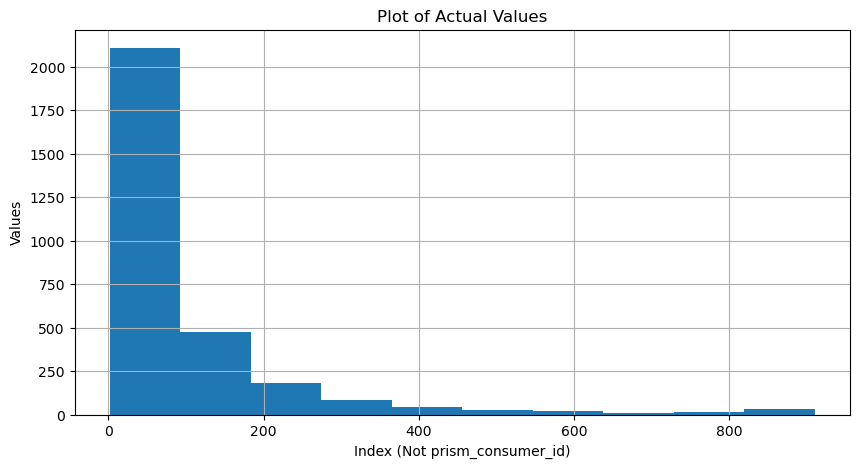

In [332]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(list(info['probability']))

# Labels and title
plt.xlabel("Index (Not prism_consumer_id)")
plt.ylabel("Values")
plt.title("Plot of Actual Values")
plt.grid(True)

In [205]:
info[info['probability'] < 500].shape[0]

2484

In [333]:
info

,probability,top_1_feature,top_1_score,top_2_feature,top_2_score,top_3_feature,top_3_score
prism_consumer_id,,,,,,,
4000,5,ATM_CASH_count,0.197096,ESSENTIAL_SERVICES_count,0.152379,ACCOUNT_FEES_count,0.140193
4001,30,LOAN_count,0.161585,REFUND_mean,0.129386,ACCOUNT_FEES_count,0.117561
4002,5,REFUND_skewness,0.161330,ESSENTIAL_SERVICES_count,0.148610,ACCOUNT_FEES_count,0.121736
4003,36,BANKING_CATCH_ALL_coef_variation,0.265769,ATM_CASH_count,0.206496,ESSENTIAL_SERVICES_count,0.164008
4004,3,ATM_CASH_count,0.206104,LOAN_count,0.145255,ACCOUNT_FEES_count,0.121508
...,...,...,...,...,...,...,...
14995,230,balance,0.474529,account_type_SAVINGS,0.424305,BNPL_mean,0.173496
14996,26,INVESTMENT_INCOME_std,0.285441,BANKING_CATCH_ALL_coef_variation,0.222544,ACCOUNT_FEES_median,0.222124
14997,82,balance,0.482480,account_type_SAVINGS,0.325705,ESSENTIAL_SERVICES_count,0.167627
